### SOME EXTRA DATA FOR MYSELF:
* https://www.abs.gov.au/census/find-census-data/geopackages?release=2021&geography=VIC&gda=GDA2020&table=G01
* https://www.abs.gov.au/census/find-census-data/census-data-tools

* Our Story outline -> Urban Forest denisty by 10m^2 as example -> Compare the micro climate sensor readings? Does it reduce temp, does it help with PM2.5 and 10 sequestration? 
    * Perform a more macro comparison of a suburb density and temperature (can we find this data?)

    * We can show the fluctuations overtime, with areas with less tress maybe fluctuate a lot more, while areas with more have less radical movements.

* Now we can swing the story a bit to 

# 1.Motivation
---

## What is your dataset?
* Our backbone dataset is the Melbourne Urban Forest dataset (LINK) that will serve as the central idea for our story. From here we will build our story to link the impact trees can have within our community.

## Why did you choose this/these particular dataset(s)?
* As a group we had two large motivators for choosing the Melbourne dataset, first and foremost (Mikolaj) one of our group members home and place of birth is Melbourne. So being able to write a project based on data from familiar territory, and on areas which are known sounded both interesting and maybe even a slight cure for the days you get some homesickness. 
Secondly, 

## What was your goal for the end user's experience?
* Our goal is to take the user on a data driven journey showcasing the power of vegetation and turning our outdated city planning model of concerete and buildings into a scientifically backed justifaction why re-foresting urban areas is needed, and what other positive side effects occur from it. We will show the user that areas with greater concentration of trees can lead to better satisfaction of living, increased health benefits, brings in bigger insect populations and most importantly reduces the ambient temperature making Melbourne more livable in a future where the temperatures are rising, and eventually will make some areas unlivable!


# 2.Basic stats. Let's understand the dataset better
---

## Write about your choices in data cleaning and preprocessing

## Write a short section that discusses the dataset stats, containing key points/plots from your exploratory data analysis.

# 3.Data Analysis
---

## Describe your data analysis and explain what you've learned about the dataset.

## If relevant, talk about your machine-learning.

# 4.Genre. Which genre of data story did you use?
---

## Which tools did you use from each of the 3 categories of Visual Narrative (Figure 7 in Segal and Heer). Why?

## Which tools did you use from each of the 3 categories of Narrative Structure (Figure 7 in Segal and Heer). Why?

# 5.Visualizations.
---

## Explain the visualizations you've chosen.

## Why are they right for the story you want to tell?

# 6.Discussion. Think critically about your creation
---

## What went well?

## What is still missing? What could be improved? Why?

# 7.Contributions. Who did what?
---

## You should write (just briefly) which group member was the main responsible for which elements of the assignment. (I want you guys to understand every part of the assignment, but usually there is someone who took lead role on certain portions of the work. That's what you should explain).

* It is not OK simply to write "All group members contributed equally".
* Make sure that you use references when they're needed and follow academic standards.

# Code for data analysis:

## PLEASE NOTE: Realised this database was not as extensive as advertised on the database link. Decided to scrap this use

### Microclimate sensor readings (without timeseries) a stationary look at the impact of trees vs environmental readings:

* RH = Relative Humidity.
* WS = Wind speed


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
import json
import geopandas

ModuleNotFoundError: No module named 'geopandas'

In [ ]:
# Soil sensor readings data analysis:

# Import the sensor reading and locations datasets:

df_sensor_read = pd.read_csv("microclimate-sensor-readings.csv")
df_sensor_loc = pd.read_csv("microclimate-sensor-locations.csv")



In [ ]:
# Append the reading dataset with the lat and lon of the sensor location (site:)
df_sensor_read_merge = df_sensor_read.merge(df_sensor_loc[['site_id', 'latitude', 'longitude']], on='site_id', how='left')
df_sensor_read_merge.head(10)

,local_time,id,site_id,sensor_id,value,type,units,gatewayhub_id,site_status,latitude,longitude
0,2023-11-29T22:15:02+00:00,8110553,1011,5b,74.38,TPH.RH,%,arc1055,C,-37.822222,144.952222
1,2023-11-29T22:15:02+00:00,8110558,1011,5c,1010.80,TPH.PRESSURE,hPa,arc1055,C,-37.822222,144.952222
2,2023-11-29T22:15:03+00:00,8110562,1011,6,0.00,WS,km/h,arc1055,C,-37.822222,144.952222
3,2023-11-29T22:15:04+00:00,8110606,1012,6,0.00,WS,km/h,arc1048,C,-37.813333,144.970000
4,2023-11-29T22:15:11+00:00,8110489,1009,0a,5.30,PM2.5,ug/m^3,arc1050,C,-37.816868,144.965705
5,2023-11-29T22:30:02+00:00,8110554,1011,5b,74.19,TPH.RH,%,arc1055,C,-37.822222,144.952222
6,2023-11-29T22:30:11+00:00,8110490,1009,0a,5.20,PM2.5,ug/m^3,arc1050,C,-37.816868,144.965705
7,2023-11-29T22:30:11+00:00,8110500,1009,0b,19.30,PM10,ug/m^3,arc1050,C,-37.816868,144.965705
8,2023-11-29T22:30:11+00:00,8110523,1011,0a,5.90,PM2.5,ug\/m^3,arc1055,C,-37.822222,144.952222
9,2023-11-29T22:30:11+00:00,8110532,1011,0b,24.80,PM10,ug\/m^3,arc1055,C,-37.822222,144.952222


In [ ]:
# Convert the time/date col into parsable format:
df_sensor_read_merge['local_time'] = pd.to_datetime(df_sensor_read_merge['local_time'])

# Find the min and max dates so we know the range:
start_date = df_sensor_read_merge['local_time'].min()
end_date = df_sensor_read_merge['local_time'].max()

print("Start Date: ", start_date, "End Date: ", end_date)

Start Date:  2023-11-29 22:15:02+00:00 End Date:  2023-11-29 23:00:11+00:00


In [ ]:
# Group by the location of the sensor:
df_id_1011 = df_sensor_read_merge[df_sensor_read_merge['site_id'] == 1011] #isolating the site IDs
df_id_1012 = df_sensor_read_merge[df_sensor_read_merge['site_id'] == 1012] 
df_id_1009 = df_sensor_read_merge[df_sensor_read_merge['site_id'] == 1009] 

# Site ID 1011 mean values:
df_id_1011_gType = df_id_1011.groupby(['type']).mean(numeric_only=True)
df_id_1011_gType.head()

# Site ID 1012 mean values:
df_id_1012_gType = df_id_1012.groupby(['type']).mean(numeric_only=True)
df_id_1012_gType.head()

# Site ID 1012 mean values:
df_id_1009_gType = df_id_1009.groupby(['type']).mean(numeric_only=True)
df_id_1009_gType.head()


,id,site_id,value,latitude,longitude
type,,,,,
PM10,8110500.5,1009.0,22.925,-37.816868,144.965705
PM2.5,8110490.5,1009.0,5.200,-37.816868,144.965705


### Plotting temperature overtime

<Axes: xlabel='local_time'>

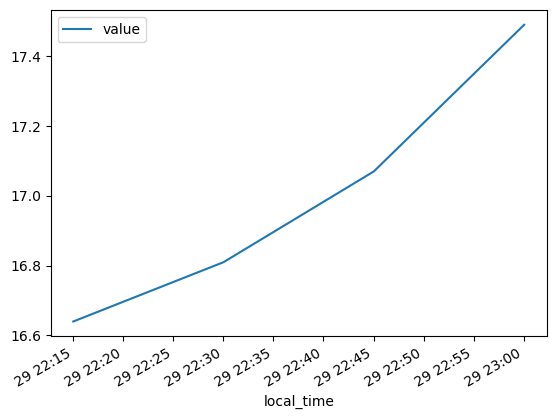

In [ ]:
# Plot the temperature over time:
df_id_1011_temp = df_id_1011[df_id_1011['type'] == 'TPH.TEMP']

df_id_1011_temp.plot(x='local_time', y='value')

# Sensor readings, with temperature, light, humidity every 5 minutes at 8 locations DATASET:

* Trying similar as above but now with a more reobust dataset:

In [ ]:
df_sensors = pd.read_csv("sensor-readings-with-temperature-light-humidity-every-5-minutes-at-8-locations-t.csv")

In [ ]:
df_sensors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56570 entries, 0 to 56569
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     56570 non-null  object 
 1   mac           56570 non-null  object 
 2   boardtype     56570 non-null  int64  
 3   boardid       56570 non-null  int64  
 4   temp_max      56570 non-null  float64
 5   temp_min      56570 non-null  float64
 6   temp_avg      56570 non-null  float64
 7   light_max     56570 non-null  float64
 8   light_min     56570 non-null  float64
 9   light_avg     56570 non-null  float64
 10  humidity_min  56570 non-null  float64
 11  humidity_max  56570 non-null  float64
 12  humidity_avg  56570 non-null  float64
 13  model         56570 non-null  object 
 14  latitude      56570 non-null  float64
 15  longitude     56570 non-null  float64
 16  elevation     34975 non-null  float64
 17  location      56570 non-null  object 
 18  rowid         56570 non-nu

In [ ]:
# Fix the date time:
df_sensors['timestamp'] = pd.to_datetime(df_sensors['timestamp'], utc=True)

# Find the min and max dates so we know the range:
start_date = df_sensors['timestamp'].min()
end_date = df_sensors['timestamp'].max()

print("Start Date: ", start_date, "End Date: ", end_date)



Start Date:  2014-12-15 01:40:00+00:00 End Date:  2015-06-05 04:15:00+00:00


In [ ]:
# Groupby the location:
df_sensors_grouped_geolocation = df_sensors.groupby(['geolocation'])
df_sensors_grouped_location = df_sensors.groupby(['location']) # There are only two locations but 8 sensors within those locations.

df_sensors_grouped_location.size()

location
Docklands Library    42381
Fitzroy Gardens      14189
dtype: int64

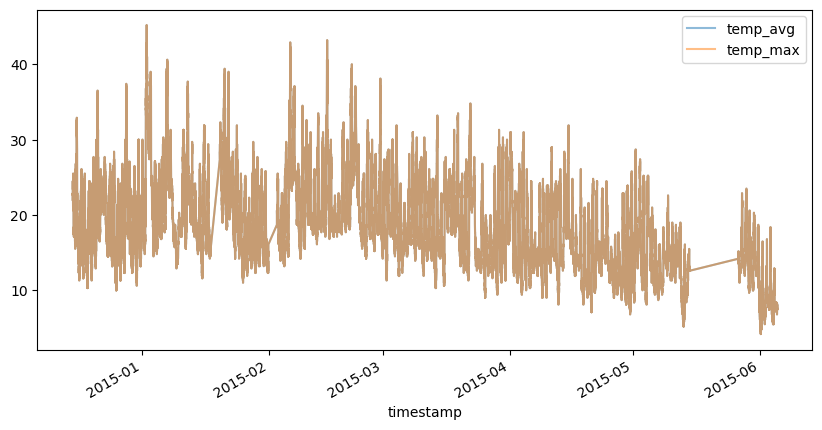

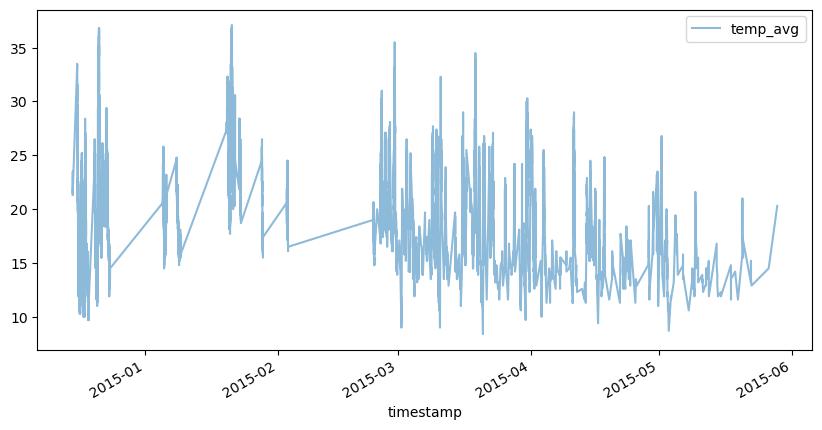

In [ ]:
# Plotting a temperature curve for the library:
df_sensors_library = df_sensors[df_sensors['location'] == 'Docklands Library']

ax = df_sensors_library.plot(x='timestamp', y='temp_avg', figsize=(10,5), alpha=0.5)
df_sensors_library.plot(x='timestamp', y='temp_max', figsize=(10,5), ax=ax, alpha=0.5) # seems like max, min and avg are all the same
plt.show()

# Plotting temperature curve for Fitzroy Gardens
df_sensors_fitzroy = df_sensors[df_sensors['location'] == 'Fitzroy Gardens']
df_sensors_fitzroy.plot(x='timestamp', y='temp_avg', figsize=(10,5), alpha=0.5)
plt.show()

### Comparing two microclimate temperature locations:

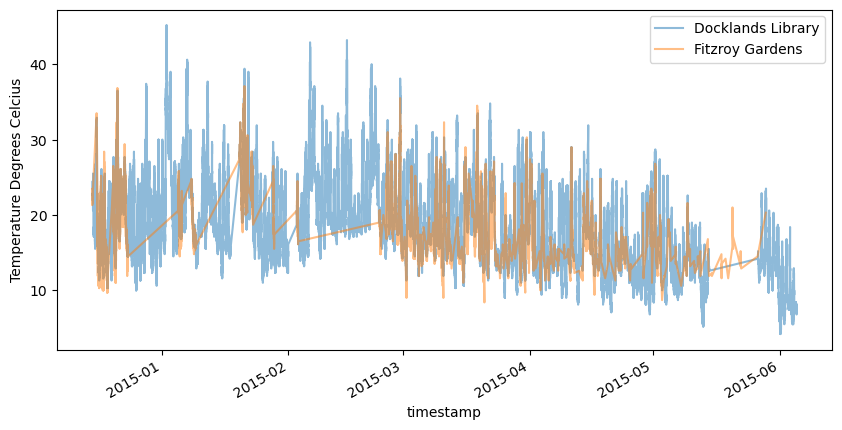

In [ ]:
# Plot the two locations over each other to see if they experience similar weather:
ax = df_sensors_library.plot(x='timestamp', y='temp_avg', figsize=(10,5), alpha=0.5, label='Docklands Library')
ax.set_ylabel('Temperature Degrees Celcius')
df_sensors_fitzroy.plot(x='timestamp', y='temp_avg', figsize=(10,5), alpha=0.5, ax=ax, label='Fitzroy Gardens')
plt.show()

### Comparing light during the day:

In [ ]:
# We will only look at one day because looking at the chart over the entire time series is essenitially just 0 to 100 (day and night), so we want to see the trend over the day.

# Creating a time mask for the period we want:
# * Lets take 2015-03-10

start_date = '2015-03-10 00:00:00+00:00'
end_date = '2015-03-10 23:59:59+00:00'

time_mask_library = (df_sensors_library['timestamp'] > start_date) & (df_sensors_library['timestamp'] <= end_date)
time_mask_fitzroy = (df_sensors_fitzroy['timestamp'] > start_date) & (df_sensors_fitzroy['timestamp'] <= end_date)

df_sensors_library_0310 = df_sensors_library.loc[time_mask_library]
df_sensors_fitzroy_0310 = df_sensors_fitzroy.loc[time_mask_fitzroy]





This is shows 1 day from 00:00 to 23:59

Counter intuitively the closer to the value of 100 means less light, and vice-versa I assume because the sensor is some kind of photo-voltaic resistor, when there is light it acts as a resistor.

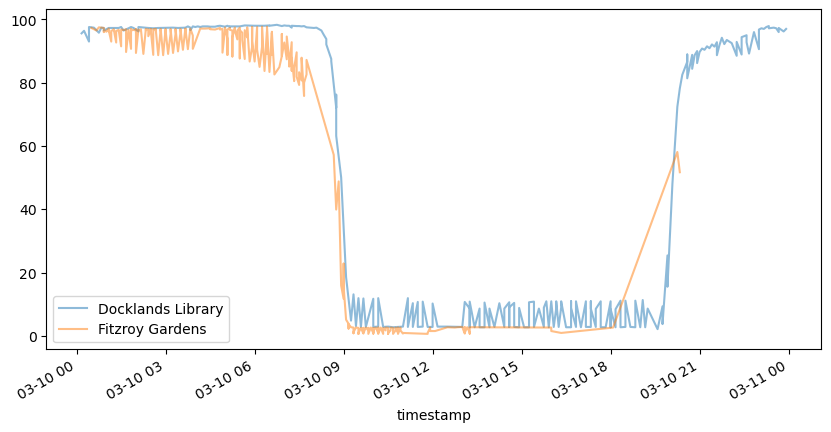

In [ ]:
ax = df_sensors_library_0310.plot(x='timestamp', y='light_avg', figsize=(10,5), alpha=0.5, label='Docklands Library')
df_sensors_fitzroy_0310.plot(x='timestamp', y='light_avg', figsize=(10,5), alpha=0.5, ax=ax, label='Fitzroy Gardens')
plt.show()

Plotting the humidity curve for the same day:

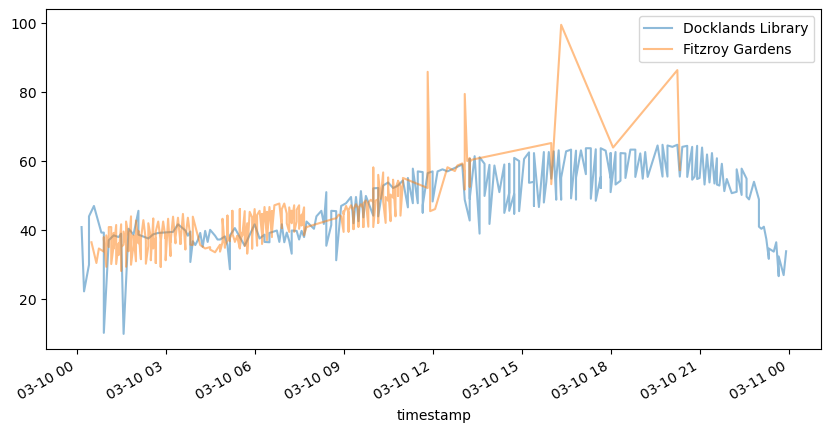

In [ ]:
ax = df_sensors_library_0310.plot(x='timestamp', y='humidity_avg', figsize=(10,5), alpha=0.5, label='Docklands Library')
df_sensors_fitzroy_0310.plot(x='timestamp', y='humidity_avg', figsize=(10,5), alpha=0.5, ax=ax, label='Fitzroy Gardens')
plt.show()

### Making a TimeSliderCloropleth map to show the changing readings over time on a map
* This can then be overlayed with the tree denisty measurements
* https://python-visualization.github.io/folium/latest/user_guide/plugins/timeslider_choropleth.html

In [ ]:
df_argyle = pd.read_csv('argyle_meshed-sensor-type-1.csv')
df_argyle.head()

,dev_id,date_measure,RTC,battery,solarPanel,command,solar,precipitation,strikes,windSpeed,windDirection,gustSpeed,vapourPressure,atmosphericPressure,relativeHumidity,airTemp,Lat Long,Sensor Name
0,atmos41-32fc,2020-06-02T00:44:33+02:00,1.100097e+09,0.308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"-37.8022141, 144.9656262",Weather Station
1,atmos41-32fc,2020-06-02T01:05:42+02:00,1.100097e+09,0.308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"-37.8022141, 144.9656262",Weather Station
2,atmos41-32fc,2020-06-02T02:35:12+02:00,5.382000e+03,4.206,21.766,0.0,261.0,0.0,0.0,1.27,263.2,4.88,1.06,101.39,76.0,12.0,"-37.8022141, 144.9656262",Weather Station
3,atmos41-32fc,2020-06-02T03:34:07+02:00,8.916000e+03,4.212,21.331,0.0,255.0,0.0,0.0,2.30,262.9,6.54,1.09,101.37,72.0,13.2,"-37.8022141, 144.9656262",Weather Station
4,atmos41-32fc,2020-06-02T03:49:27+02:00,9.836000e+03,4.206,21.822,0.0,145.0,0.0,0.0,1.94,261.1,6.35,1.09,101.36,71.0,13.3,"-37.8022141, 144.9656262",Weather Station


# Adding another microclimate dataset (Argyle Square) - Park
* to bolster our dataset as two areas was not enough to get an idea

# Another climate sensor location Olympic Park:
* We can also use the other weather station location:
    * http://www.bom.gov.au/cgi-bin/climate/hqsites/site_data.cgi?period=annual&variable=maxT&station=087031
    * http://www.bom.gov.au/climate/change/hqsites/

**NOTE: To make the observations with the climate/temp data we will have to then compare it to averages/large datasets like overall weather data recorded in Melb from the BOM daily temp report as example... this way we can show those higher tree density areas might experience lower temperature to the overall mean temp seen in the city** I see no other way to do these comparisons otherwise...

* We should consider those biodiversity datasets as well to get some content in.

* MOST importantly it will be the community satisfaction one I believe / socio-economics with areas with more trees, since we have MORE widespread localised data.

# Creating a shapefile for Melbourne suburbs and a list of the North, East, West and South divide:


In [3]:
import json

# Load the geojson:
with open('vicboundaries.json') as f:
    vicsub = json.load(f)

In [7]:
# Filter data
filtered_data = [item for item in vicsub['features'] if item['properties']['loc_pid'].startswith('VIC') and '3101' <= item['properties']['loc_pid'] <= 'VIC3148']

# Sort data
sorted_data = sorted(filtered_data, key=lambda x: x['properties']['loc_pid'])


# Save sorted data to a new JSON file
with open('Eastern_Suburbs.json', 'w') as file:
    json.dump(filtered_data, file)

TypeError: '<=' not supported between instances of 'int' and 'str'